### Score: 88

Q1.[4+10+9]

Q2.[10]

Q3.[5+5+5+5+5+5+5+4+2+0]

Q4.[5+5+4]

In [2]:
# import pandas 
import pandas as pd
# import numpy
import numpy as np
# import matplotlib
from matplotlib import pyplot as plt
# make plots appear and be stored within the notebook
%matplotlib inline

In [18]:
#exercie1
#1.1
Sig_Eqs = pd.read_csv(r"C:\Users\zjm\Desktop\ESE_5023\earthquakes-2024-10-23_13-55-19_+0800.tsv",sep='\t')   #读取tsv文件
# NOTE: 注意是读取Total Deaths列 -1
Total_Deaths=Sig_Eqs.groupby(["Country"])['Deaths'].sum().sort_values(ascending=False).reset_index()  #按照country分组，只显示deaths，求和，降序排序
print(Total_Deaths[0:21]) #打印前20

         Country     Deaths
0          CHINA  2075947.0
1         TURKEY  1188881.0
2           IRAN  1011453.0
3          ITALY   498418.0
4          SYRIA   439224.0
5          HAITI   323478.0
6     AZERBAIJAN   317219.0
7          JAPAN   279607.0
8        ARMENIA   191890.0
9       PAKISTAN   145083.0
10          IRAQ   136200.0
11       ECUADOR   135496.0
12  TURKMENISTAN   117412.0
13          PERU   102169.0
14        ISRAEL    90388.0
15      PORTUGAL    83572.0
16        GREECE    80378.0
17         CHILE    64277.0
18         INDIA    63507.0
19        TAIWAN    57153.0
20       TUNISIA    48013.0


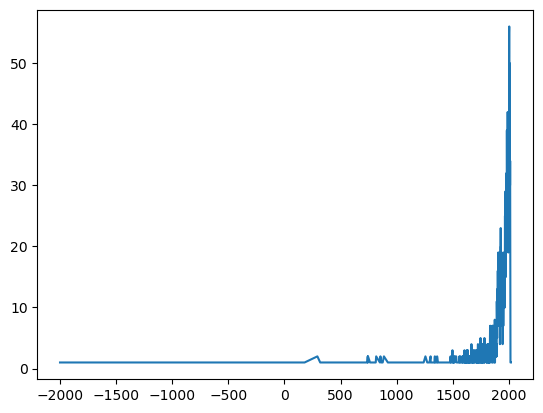

In [19]:
#1.2
Ms_counts = Sig_Eqs.loc[(Sig_Eqs['Ms']>3.0)].groupby('Year').size() #按照年分组，大于3级的，每一年的个数
Ms_counts.index
# Ms_counts.plot()
plt.plot(Ms_counts.index, Ms_counts)
plt.show()

#发现趋势：1500年之前基本上是平的，从1500年到现在显著增加。
#可能是1500年之前大地震的记录很少或者没有被保存下来

In [32]:
Sig_Eqs
Sig_Eqs.columns

Index(['Search Parameters', 'Id', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu',
       'Vol', 'Country', 'Area', 'Region', 'Location Name', 'Latitude',
       'Longitude', 'Focal Depth (km)', 'Mag', 'Mw', 'Ms', 'Mb', 'Ml', 'Mfa',
       'Unk', 'MMI Int', 'Deaths', 'Death Description', 'Missing',
       'Missing Description', 'Injuries', 'Injuries Description',
       'Damage ($Mil)', 'Damage Description', 'Houses Destroyed',
       'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Total Deaths', 'Total Death Description',
       'Total Missing', 'Total Missing Description', 'Total Injuries',
       'Total Injuries Description', 'Total Damage ($Mil)',
       'Total Damage Description', 'Total Houses Destroyed',
       'Total Houses Destroyed Description', 'Total Houses Damaged',
       'Total Houses Damaged Description'],
      dtype='object')

In [ ]:
#1.3
def CountEq_LargestEq(country):
    # NOTE: 没有计算给定国家发生地震的总数 -1
    print(Total_Deaths.loc[Total_Deaths['Country']==country])  #打印输入国家的死亡总人数
    #只筛选输入的国家，按照Ms降序排序，定位在第1行，'Year','Mo','Dy','Location Name'列，去除index数字
    print(Sig_Eqs.loc[Sig_Eqs['Country']==country].sort_values(['Ms'],ascending = False).iloc[[0]][['Year','Mo','Dy','Location Name']].to_string(index=False))
          
Country=list(Total_Deaths['Country']) #按照死亡总人数降序创建国家的列表

for element in Country:          #遍历集合里的每一个国家
    CountEq_LargestEq(element)     #打印死亡总人数和最大地震的时间地点

In [28]:
#Exercise2
Air_data = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\Baoan_Weather_1998_2022.csv')    #读取数据

# 使用 str.split 提取数字,将逗号前后数字分别保存为两列,并将温度数据格式转为FLOAT。从网上查找
Air_data[['Temperature', 'DOM']] = Air_data['TMP'].str.split(',', expand=True)
Air_data['Temperature'] = Air_data['Temperature'].astype(float)/10                     #温度除以10
#检查dom数字有哪些
DOM_check =Air_data['DOM'].unique()
Temperature_check = Air_data['Temperature'].unique()
print(DOM_check)
print(Temperature_check)
#排除dom=2和温度=999.9的数据
Air_data2=Air_data.loc[(Air_data['DOM']!='2') & (Air_data['Temperature']!=999.9) ][['Temperature','DATE']]
#日期格式
Air_data2['DATE'] = pd.to_datetime(Air_data2['DATE'])
Air_data2
# 提取年份和月份
Air_data2['Year'] = Air_data2['DATE'].dt.year
Air_data2['Month'] = Air_data2['DATE'].dt.month
# 按年和月分组并计算每个月的平均温度
monthly_avg_temperature = Air_data2.groupby(['Year', 'Month'])['Temperature'].mean().reset_index()

monthly_avg_temperature['Temperature'].plot() #绘图

#发现月平均气温在25年内具有周期性。



C:\Users\zjm\AppData\Local\Temp\ipykernel_12208\295460492.py:2: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  Air_data = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\Baoan_Weather_1998_2022.csv')    #读取数据


['1' '9' '2' '5']
[ 18.6  22.   24.   22.1  25.4  25.   25.3  23.   22.2  21.   20.   19.
  18.1  17.5  17.   16.   16.7  20.6  21.2  20.8  19.7  19.5  19.3  19.4
  21.7  22.5  22.3  18.9  18.7  20.1  16.8  15.   14.5  14.   13.   12.9
  12.   12.5  13.7  15.4  16.4  15.7  14.2  18.   19.1  17.4  17.9  18.5
  17.8  26.   29.   24.9  20.3  20.9  20.7  19.8  19.9  25.9  24.1  20.4
  23.6  24.5  21.4  16.2  18.4  21.1  23.7  16.6  13.5  12.1  11.   11.1
  14.9  14.7  12.2  10.   10.3  10.2  10.8  12.6  15.5  15.6  13.8   9.
   8.6   8.    7.9  10.1   8.2   7.8   8.4   9.3   8.3   8.1   9.8  10.7
   8.9   9.4  10.9  11.3  12.3  17.1  11.5   9.5  12.7   8.5   7.6   8.7
   8.8   9.7   9.2  11.7  12.8  13.3  15.1  14.8  13.2  14.6  12.4  14.3
  13.4  13.1  15.9  17.2  23.4  16.1  16.3  17.7  20.5  18.3  18.2  22.7
  11.8   7.    7.4   7.7   7.5   6.8   7.2  10.5  10.4  16.9  18.8  16.5
  21.6  25.5  24.7  23.1  21.9  27.   23.9  22.6  23.3  25.6  20.2  25.7
  25.2  24.8  23.5  22.4  25.8  26.

<Axes: >

In [3]:
#Exercise3
df = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                 usecols=range(15),
                 skiprows=[1], 
                 parse_dates=['ISO_TIME'],
                 )
# 替换空字符串为 NaN，并转化数据类型为folat
# NOTE: 这里是将空格字符替换为了0
df['WMO_WIND'] = df['WMO_WIND'].replace(' ', 0)

df['WMO_WIND'] =df['WMO_WIND'].astype(float)
# 按 SID 分组并找出每个风暴的最大风速和对应的名称
max_wind = df.groupby('SID').agg({'NAME': 'first', 'WMO_WIND': 'max'})
max_wind 
# 按最大风速排序，并获取前十个
top_hurricanes = max_wind.sort_values(by='WMO_WIND', ascending=False).reset_index().head(10)
top_hurricanes
print(top_hurricanes[['NAME', 'WMO_WIND']])




        NAME  WMO_WIND
0   PATRICIA     185.0
1      ALLEN     165.0
2      LINDA     160.0
3      WILMA     160.0
4     DORIAN     160.0
5    GILBERT     160.0
6  NOT_NAMED     160.0
7      MITCH     155.0
8       IRMA     155.0
9       RICK     155.0


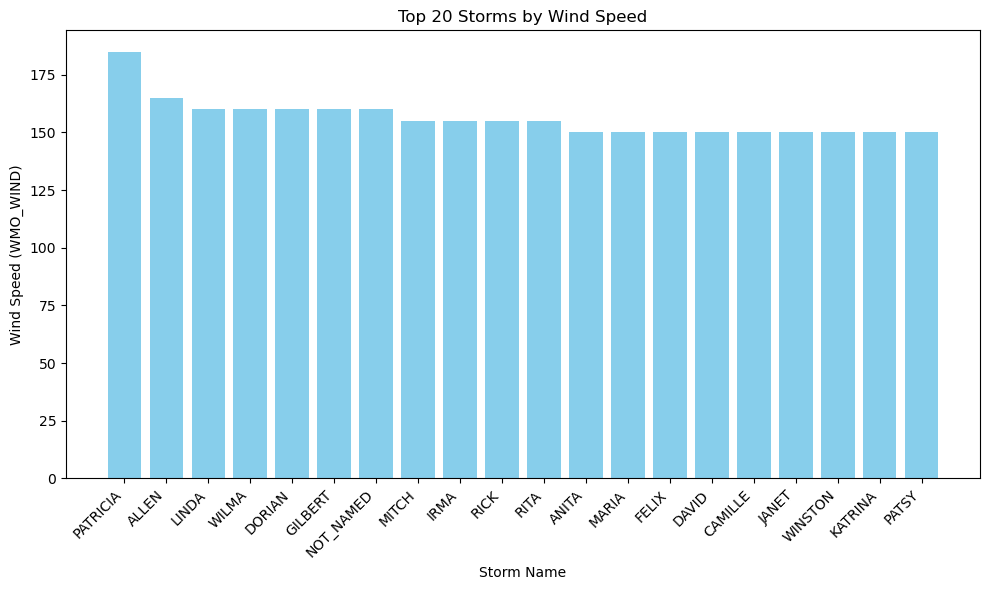

In [31]:
#3.2
strongest_20wind  = max_wind.sort_values(by='WMO_WIND', ascending=False).reset_index().head(20)     #风速前20
# 绘制图形
plt.figure(figsize=(10, 6))
plt.bar(strongest_20wind['NAME'], strongest_20wind['WMO_WIND'], color='skyblue')
plt.xlabel('Storm Name')
plt.ylabel('Wind Speed (WMO_WIND)')
plt.title('Top 20 Storms by Wind Speed')
plt.xticks(rotation=45, ha='right')  # 旋转横坐标标签
plt.tight_layout()  # 自适应布局
plt.show()

  BASIN       0
0    EP   62412
1    NI   55402
2    SA     119
3    SI  160668
4    SP   67119
5    WP  236576
  BASIN   Count
0    EP   62412
1    NI   55402
2    SA     119
3    SI  160668
4    SP   67119
5    WP  236576


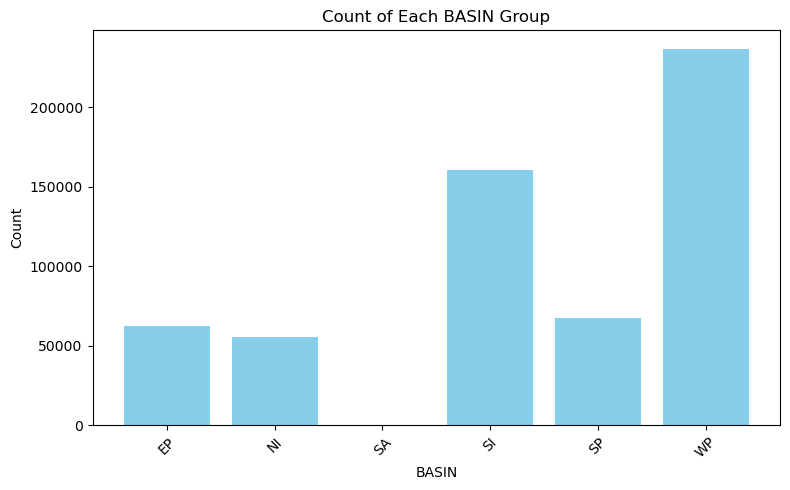

In [12]:
#3.3# 按 BASIN 分组并计算每组的个数
BASIN_count=df.groupby('BASIN').size().reset_index()
BASIN_count.columns = ['BASIN', 'Count']  # 重命名列
print(BASIN_count)
# 绘制条形图
plt.figure(figsize=(8, 5))
plt.bar(BASIN_count['BASIN'], BASIN_count['Count'], color='skyblue')
plt.xlabel('BASIN')
plt.ylabel('Count')
plt.title('Count of Each BASIN Group')
plt.xticks(rotation=45)  # 旋转横坐标标签
plt.tight_layout()  # 自适应布局
plt.show()

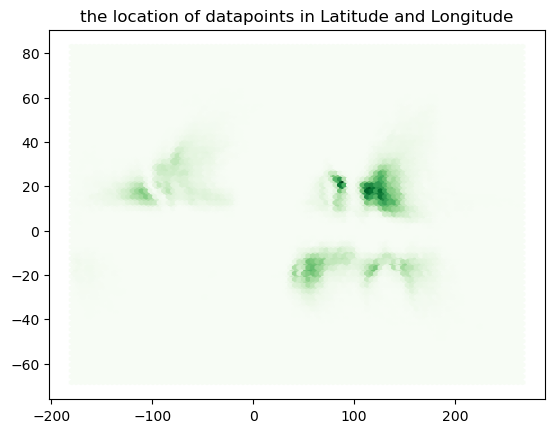

In [58]:
#3.4
# 按 LAT,LON分组并计算每组的个数
Location_count=df.groupby(['LAT','LON']).size().reset_index()
Location_count.columns = ['LAT', 'LON','Count']  # 重命名列
Location_count.sort_values('Count', ascending=False).reset_index().head(20) #展示数量最多的前20个点
plt.hexbin(Location_count['LON'], Location_count['LAT'] , gridsize = 100,  cmap ='Greens')  #横坐标为LON,纵坐标LAT
plt.title('the location of datapoints in Latitude and Longitude')  
plt.show()

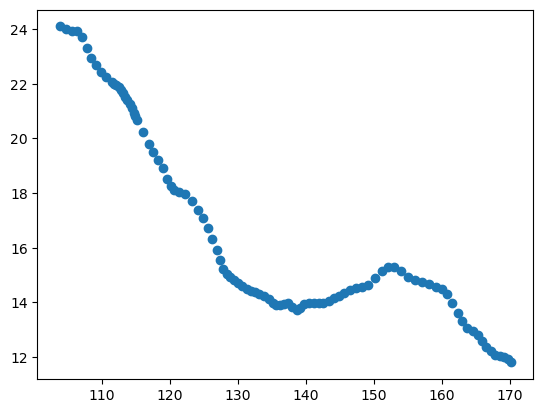

In [399]:
#3.5
Mangkhutdf_2018=df.loc[(df['NAME']=='MANGKHUT') &  (df['SEASON']==2018) ][['LON','LAT']]
x=Mangkhutdf_2018['LON']
y=Mangkhutdf_2018['LAT'] #经纬度坐标
plt.scatter(x, y)       #绘制散点图
plt.show()


In [61]:
#3.6
df_new = df.loc[(df['SEASON']>=1970)].loc[ (df['BASIN']=='WP')|(df['BASIN']=='EP')]#先筛选1970年之后，再筛选basin


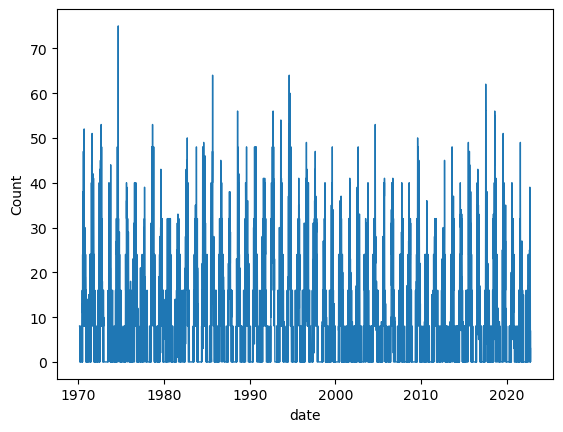

In [62]:
#3.7
datapoint_number=df_new.groupby(pd.Grouper(key='ISO_TIME', axis=0, freq='1D', sort=True)).size().reset_index()
datapoint_number.columns = ['DATE', 'Count']  # 重命名列
plt.plot(datapoint_number['DATE'], datapoint_number['Count'],  linewidth=1)#'bo-'表示蓝色实线，数据点实心原点标注
plt.xlabel('date') 
plt.ylabel('Count')
plt.show()


In [63]:
#3.8,不太理解
# NOTE: climatology是气候态，在这题中为计算这一天的所有年的平均值，未使用day of year -1
# 提取月和日
datapoint_number['Day'] = datapoint_number['DATE'].dt.day
datapoint_number['Month'] = datapoint_number['DATE'].dt.month
# 按月和日分组并计算自从1970年每天的平均数量
datapoint_number_clim = datapoint_number.groupby(['Month','Day'])['Count'].mean().reset_index()

datapoint_number_clim['Count'].plot() #绘图
 #不太理解climatology是什么意思。是按照365天每一天进行分组，然后计算这几十年的平均值吗？
datapoint_number_clim

,Month,Day,Count
0,1,1,1.596154
1,1,2,1.384615
2,1,3,1.423077
3,1,4,1.788462
4,1,5,2.019231
...,...,...,...
361,12,27,3.057692
362,12,28,2.865385
363,12,29,2.615385
364,12,30,1.884615


In [64]:
#3.9
#看不懂题目的意思。是用1970年开始每一天减去对应的climatology吗？
# NOTE: 是的
group_data = datapoint_number.groupby(['Month','Day'])
# Apply mean to grouped data, and then compute the anomaly 
datapoint_anom = group_data['Count']-group_data['Count'].mean()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (366, 2) + inhomogeneous part.

In [ ]:
#3.10
#不会做，也看不懂。什么是anomalous hurricane activity呢？跟均值差多少算呢？
# NOTE: 这题意思是使用resample对3.9计算的anomaly timeseries重采样到年分辨率并绘图，依据成图分析哪一年有异常台风活动
#

In [65]:
#Exercise4
#4.1
#获取数据from National Centers for Environmental Information (NCEI) 的UNIVERSITY OF MN ST. PAUL, MN US (USC00218450.csv)
data = pd.read_csv('USW00024089.csv') #读取csv文件
#关注PRCP这一列。似乎是降水？
data =data.dropna(subset=['PRCP']) #删除PRCP列中含空值的行
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')  # 将日期列转换为日期格式
data.set_index('DATE', inplace=True) #将日期设置为索引

data

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,ADPT,ADPT_ATTRIBUTES,ASLP,ASLP_ATTRIBUTES,ASTP,...,WDFG,WDFG_ATTRIBUTES,WSF1,WSF1_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,
1948-08-01,USW00024089,42.89778,-106.47361,1621.1,"CASPER NATRONA CO AIRPORT, WY US",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-09-01,USW00024089,42.89778,-106.47361,1621.1,"CASPER NATRONA CO AIRPORT, WY US",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-10-01,USW00024089,42.89778,-106.47361,1621.1,"CASPER NATRONA CO AIRPORT, WY US",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-11-01,USW00024089,42.89778,-106.47361,1621.1,"CASPER NATRONA CO AIRPORT, WY US",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-12-01,USW00024089,42.89778,-106.47361,1621.1,"CASPER NATRONA CO AIRPORT, WY US",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,USW00024089,42.89778,-106.47361,1621.1,"CASPER NATRONA CO AIRPORT, WY US",0.78,",,,W",1010.1,",,,W",833.3,...,NaN,NaN,NaN,NaN,17.4,",W",23.7,",W",NaN,NaN
2024-06-01,USW00024089,42.89778,-106.47361,1621.1,"CASPER NATRONA CO AIRPORT, WY US",5.56,",,,W",1009.1,",,,W",835.5,...,NaN,NaN,NaN,NaN,18.3,",W",26.8,",W",NaN,NaN
2024-07-01,USW00024089,42.89778,-106.47361,1621.1,"CASPER NATRONA CO AIRPORT, WY US",5.02,",,,W",1014.1,",,,W",840.3,...,NaN,NaN,NaN,NaN,19.2,",W",25.5,",W",NaN,NaN


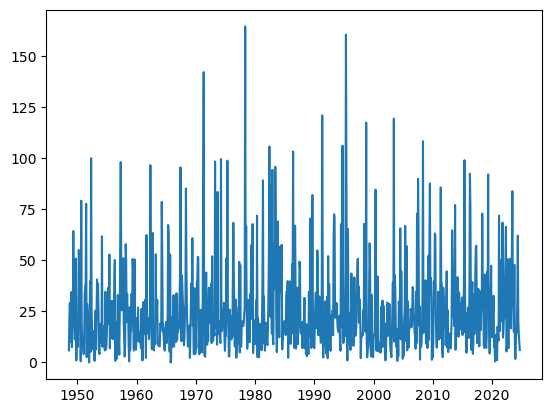

In [68]:
#4.2
# data['PRCP'].plot()
plt.plot(data['PRCP'].index, data['PRCP'])
plt.show()

Month
1     13.781579
2     14.717105
3     24.188158
4     36.693421
5     53.485526
6     34.961842
7     29.593421
8     18.276623
9     23.197403
10    26.826316
11    17.607895
12    15.207895
Name: PRCP, dtype: float64


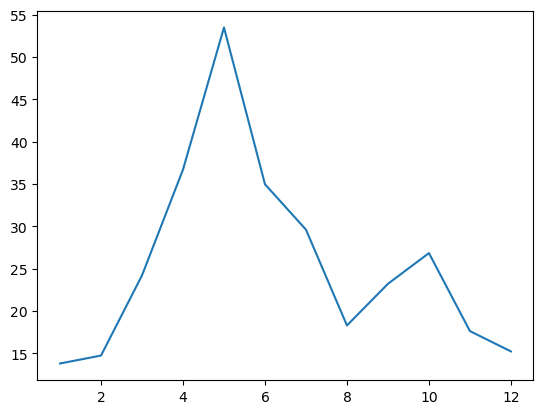

In [78]:
#4.3
#1.按月分组，计算每个月的这几十年的均值
data['Month'] = data.index.month
month_clim=data.groupby('Month')['PRCP'].mean()
# print(month_clim.shape)
# NOTE: 这里是最后一行画图的代码报错了
month_clim.columns = ['Month','PRCP']#修改列名，报错了，不知道为啥

print(month_clim)

# month_clim['PRCP'].plot()                      #画图也画不出来
# NOTE: 可以试试以下代码
plt.plot(month_clim.index, month_clim)
plt.show()
#发现一年中间的月份降水多，两边的月份降水少

In [79]:
#2.计算每一年的均值
data['Year'] = data.index.year
year_ave=data.groupby('Year')['PRCP'].mean()
year_ave
#发现有的年降水多，有的年少

C:\Users\zjm\AppData\Local\Temp\ipykernel_12208\2019269790.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Year'] = data.index.year


Year
1948    17.040000
1949    23.075000
1950    27.016667
1951    23.216667
1952    21.208333
          ...    
2020    12.325000
2021    30.791667
2022    28.350000
2023    32.608333
2024    20.455556
Name: PRCP, Length: 77, dtype: float64

In [80]:
# 3. 描述性统计
data_describe = data['PRCP'].describe()
print(data_describe)

count    914.000000
mean      25.700547
std       22.155365
min        0.000000
25%       10.825000
50%       19.200000
75%       33.000000
max      164.300000
Name: PRCP, dtype: float64


In [81]:
#4. 每一年的PRCP的标准差和方差
std_dev = data.groupby('Year')['PRCP'].std()
variance = data.groupby('Year')['PRCP'].var()
print(f"标准差: {std_dev}, 方差: {variance}")

标准差: Year
1948     9.328076
1949    18.309418
1950    23.809312
1951    21.747386
1952    27.173231
          ...    
2020    10.025887
2021    22.356632
2022    19.446594
2023    23.083306
2024    17.226949
Name: PRCP, Length: 77, dtype: float64, 方差: Year
1948     87.013000
1949    335.234773
1950    566.883333
1951    472.948788
1952    738.384470
           ...    
2020    100.518409
2021    499.819015
2022    378.170000
2023    532.839015
2024    296.767778
Name: PRCP, Length: 77, dtype: float64


In [82]:
#5 按年分布的偏度和峰度
skewness = data.groupby('Year')['PRCP'].skew()
print(f"偏度: {skewness}")

偏度: Year
1948    0.101182
1949    1.330050
1950    1.081320
1951    1.473459
1952    2.537936
          ...   
2020    0.667700
2021    1.009079
2022    0.673240
2023    0.856451
2024    2.100206
Name: PRCP, Length: 77, dtype: float64
